# Source Sheet

# Finite number of sources along a line

In [16]:
import numpy
import math
from matplotlib import pyplot
%matplotlib inline

In [17]:
N = 100
x_start, x_end = -1.0, 1.0
y_start, y_end = -1.5, 1.5
x = numpy.linspace(x_start, x_end, N)
y = numpy.linspace(y_start, y_end, N)
X, Y = numpy.meshgrid(x, y)

In [18]:
u_inf = 1.0
u_freestream = u_inf * numpy.ones((N, N), dtype=float)
v_freestream = numpy.zeros((N, N), dtype=float)

In [19]:
class Source:
    def __init__(self, strength, x, y):
        self.strength = strength
        self.x, self.y = x, y
    def velocity(self, X, Y):
        self.u = self.strength/(2*math.pi) * (X-self.x)/((X-self.x)**2+(Y-self.y)**2)
        self.v = self.strength/(2*math.pi) * (Y-self.y)/((X-self.x)**2+(Y-self.y)**2)
    def stream_function(self, X, Y):
        self.psi = self.strength/(2*math.pi) * numpy.arctan2((Y-self.y), (X-self.x))

In [22]:
N_sources = 15    #number of sources
strength = 5.0   # sum of all source strengths
strength_source = strength/N_sources   # strength of one source
x_source = numpy.zeros(N_sources, dtype=float)   # horizontal position of all sources (1D array)
y_source = numpy.linspace(-1.0, 1.0, N_sources)  # vertical position of all sources (1D array)

# create a source line (Numpy array of Source objects)
sources = numpy.empty(N_sources, dtype=object)
for i in range(N_sources):
    sources[i] = Source(strength_source, x_source[i], y_source[i])
    sources[i].velocity(X, Y)
    
# superposition of all sources to the free-stream flow
u = u_freestream.copy()
v = v_freestream.copy()

for source in sources:
    u += source.u
    v += source.v

The final flow pattern corresponds to the superposition of a uniform flow and N_sources identical sources of strength strength_source equally spaced along a vertical line normal to the uniform flow. In our plot, we'll mark the location of the sources with red points and also define a filled contour of velocity magnitude to visualize the location of the stagnation point, defined by $u=0$ and $v=0$.

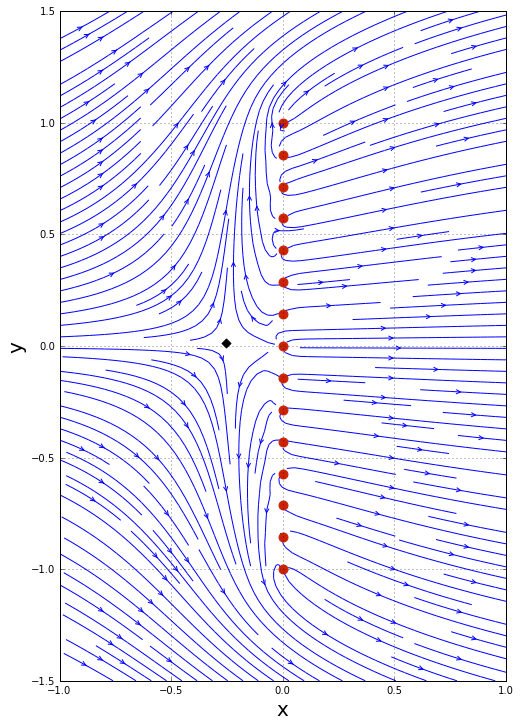

In [30]:
#plot the streamlines
size = 8
pyplot.figure(figsize=(size, (y_end-y_start)/(x_end-x_start)*size))
pyplot.grid()
pyplot.xlabel('x', fontsize=20)
pyplot.ylabel('y', fontsize=20)
pyplot.xlim(x_start, x_end)
pyplot.ylim(y_start, y_end);
pyplot.streamplot(X, Y, u, v, density=2, linewidth=1, arrowsize=1, arrowstyle='->')

#plot the sources
pyplot.scatter(x_source, y_source, color='#CD2305', s=80, marker='o')

#compute the velocity magniture and indices of the stagnation point 
#note: the stagnation point is approximated as the point with the smallest velocity magnitude
magnitude = numpy.sqrt(u**2 + v**2)
j_stagn, i_stagn = numpy.unravel_index(magnitude.argmin(), magnitude.shape)  #?

#plot the stagnation point
pyplot.scatter(x[i_stagn], y[j_stagn], color='black', s=40, marker='D')  #?

# Infinite line of sources

By definition, a source sheet is an infinite collection of side-by-side sources of infinitesimal equal strength distributed along a given path.
Consider $s$ to be the running coordinate along the sheet: we define $\sigma = \sigma(s)$ as the strength per unit length.
Recall that the strength of a single source represents the volume flow rate per unit depth (i.e., per unit length in the $z$-direction). Therefore, $\sigma$ represents the volume flow rate per unit depth and per unit length (in the $s$-direction). Thus, $\sigma ds$ is the strength of an infinitesimal portion $ds$ of the source sheet. This infinitesimal portion is so small that it can be treated as a distinct source of strength $\sigma ds$.
Following this, the stream-function at point $\left(r,\theta\right)$ of this infinitesimal portion is
$$d\psi\left(r,\theta\right) = \frac{\sigma ds}{2\pi} \theta$$
Integrating along $s$, we find the stream-function of the entire source sheet:
$$\psi\left(r,\theta\right) = \frac{\sigma}{2\pi}\int_{\text{sheet}}\theta\left(s\right)ds$$
In the previous section, we considered a vertical finite distribution of sources. Similarly, the stream function of a vertical source sheet at $x=0$ between $y_{\text{min}}$ and $y_{\text{max}}$ in Cartesian coordinates is
$$\psi\left(x,y\right) = \frac{\sigma}{2\pi}\int_{y_{\text{min}}}^{y_{\text{max}}} \tan^{-1}\left(\frac{y-\xi}{x}\right)d\xi$$
And the velocity components are
$$u\left(x,y\right) = \frac{\sigma}{2\pi} \int_{y_{\text{min}}}^{y_{\text{max}}} \frac{x}{x^2+\left(y-\xi\right)^2}d\xi$$$$v\left(x,y\right) = \frac{\sigma}{2\pi} \int_{y_{\text{min}}}^{y_{\text{max}}} \frac{y-\xi}{x^2+\left(y-\xi\right)^2}d\xi$$

In [31]:
from scipy import integrate   #in order to integrate, this time import the scipy and the integrate from it

We are going to use the function quad(func,a,b) of the module integrate to compute the definite integral of a function of one variable between two limits:
$$I=\int_a^b f(x)\ {\rm d}x$$

In short, a function created with a lambda statement is a single expression that returns a value (but without a return statement!). It is often called an anonymous function, because we don't need to give it a name.

Note that the function quad() returns a list: the first element is the result of the integral, and the second element is an estimate of the error. If you just want the value of the definite integral, you need to specify the index [0], for the first element of the list!

The numpy.vectorize() that will allow us to create a vectorized function that takes Numpy arrays as inputs and returns a Numpy array!

In [35]:
sigma = 2.5  # strength of the source-sheet

# boundaries of the source-sheet
y_min, y_max = -1.0, 1.0

# create the anonymous functions
integrand_u = lambda s, x, y: x / (x**2 + (y-s)**2)
integrand_v = lambda s, x, y: (y-s) / (x**2 + (y-s)**2)

def integration(x, y, integrand):
    return integrate.quad(integrand, y_min, y_max, args=(x, y))[0]

vec_integration = numpy.vectorize(integration)

# compute the velocity field generated by the source-sheet
u_sheet = sigma / (2.0 * numpy.pi) * vec_integration(X, Y, integrand_u)
v_sheet = sigma / (2.0 * numpy.pi) * vec_integration(X, Y, integrand_v)

# superposition of the source-sheet to the uniform flow
u = u_freestream + u_sheet
v = v_freestream + v_sheet

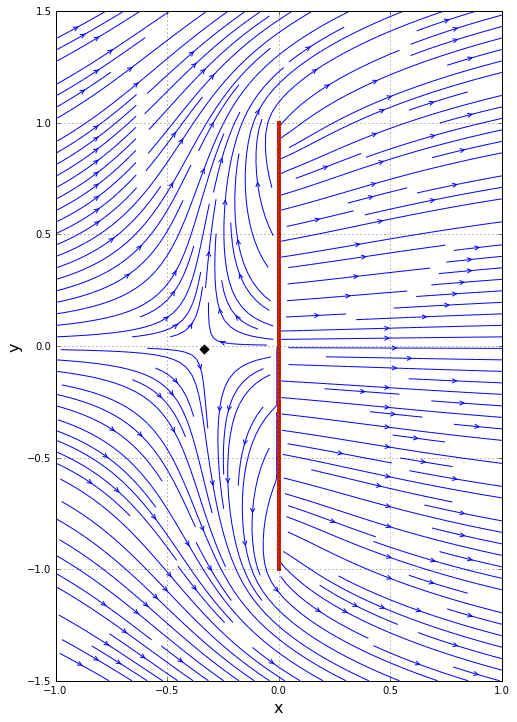

In [39]:
#plot the streamlines
size = 8
pyplot.figure(figsize=(size, (y_end-y_start)/(x_end-x_start)*size))
pyplot.grid()
pyplot.xlabel('x', fontsize=16)
pyplot.ylabel('y', fontsize=16)
pyplot.xlim(x_start, x_end)
pyplot.ylim(y_start, y_end);
pyplot.streamplot(X, Y, u, v, density=2, linewidth=1, arrowsize=1, arrowstyle='->')

# plot the source sheet
pyplot.axvline(0.0, (y_min-y_start)/(y_end-y_start), (y_max-y_start)/(y_end-y_start), color='#CD2305', linewidth=4) #?

# compute the velocity magniture and indices of the stagnation point
# note: the stagnation point is approximated as the point with the smallest velocity magnitude
magnitude = numpy.sqrt(u**2 + v**2)
j_stagn, i_stagn = numpy.unravel_index(magnitude.argmin(), magnitude.shape)

# plot the stagnation point
pyplot.scatter(x[i_stagn], y[j_stagn], color='black', s=40, marker='D')

We said that the strength $\sigma$ represents a volume flow rate emanating from the source sheet. If you play with this parameter, you will see that the stagnation point comes closer and closer to the source sheet with decreasing strength.

If we wanted to use multiple source sheets to represents the streamlines around a given body shape, we need to make each source sheet part of the dividing streamline. The question will be What is the source strength to make this happen?

The volume flow rate on just the left side of the sheet is $\frac{\sigma}{2}$, flowing in the opposite direction of the freestream velocity $U_\infty$. Therefore, the flow-tangency boundary condition required is $\frac{\sigma}{2} = U_\infty$.

Now go back to the code above an replace the sigma by the correct value. Where is the stagnation point? Where is the dividing streamline?

In [40]:
sigma = 2.0 * u_inf

#and do it again
integrand_u = lambda s, x, y: x / (x**2 + (y - s)**2)
integrand_v = lambda s, x, y: (y - s) / (x**2 + (y - s)**2)

def integration(x, y, integrand):
    return integrate.quad(integrand, y_min, y_max, args=(x, y))[0]
vec_integration = numpy.vectorize(integration)

u_sheet = sigma / (2.0 * numpy.pi) * vec_integration(X, Y, integrand_u)
v_sheet = sigma / (2.0 * numpy.pi) * vec_integration(X, Y, integrand_v)

u = u_freestream + u_sheet
v = v_freestream + v_sheet

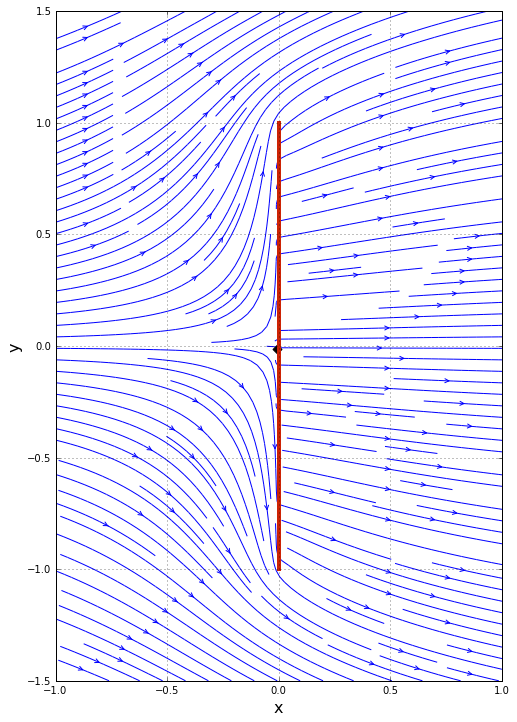

In [41]:
size = 8
pyplot.figure(figsize=(size, (y_end-y_start)/(x_end-x_start)*size))
pyplot.grid()
pyplot.xlabel('x', fontsize=16)
pyplot.ylabel('y', fontsize=16)
pyplot.xlim(x_start, x_end)
pyplot.ylim(y_start, y_end);
pyplot.streamplot(X, Y, u, v, density=2, linewidth=1, arrowsize=1, arrowstyle='->')

pyplot.axvline(0.0, (y_min-y_start)/(y_end-y_start), (y_max-y_start)/(y_end-y_start), color='#CD2305', linewidth=4)

magnitude = numpy.sqrt(u**2 + v**2)
j_stagn, i_stagn = numpy.unravel_index(magnitude.argmin(), magnitude.shape)

pyplot.scatter(x[i_stagn], y[j_stagn], color='black', s=40, marker='D')

so the stagnation point is right on the source sheet, and i believe the source sheet is the dividing streamline.